<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/gimseng/99-ML-Learning-Projects/blob/master/002/exercise/linear_regression.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Hi - Welcome to the Linear Regression exercise

## The first half of this notebook is meant for data preprocessing, it's not mandatory but heavily encouraged to go over them and understand what is going on.

## The main task of the assignment is in the second half of the notebook

### Run cells below which import all required libraries

In [2]:
import numpy as np
import pandas as pd
import sklearn, sklearn.model_selection
import matplotlib as plt

### The cell below retrieves the data and splits it into train_x, train_y, valid_x, valid_y, test_x, test_y

In [3]:
# pick how big the validation/test portion of the data is, currently set to 20% validation, 20% test, and 60% train
valid_size = 0.2
test_size = 0.2

# load the data from the .csv file
github_url = 'https://raw.githubusercontent.com/gimseng/99-ML-Learning-Projects/'
data_source = 'master/002/data/housing_prices.csv'
data = pd.read_csv(github_url+data_source)
# Drop the 'Id' column since it is a useless feature
data = data.drop(columns='Id')

def train_valid_test_split(data, valid_size, test_size):
    # split into train and test
    train, test = sklearn.model_selection.train_test_split(data, test_size=test_size)
    # further split train into train and validation. (valid_size needs to be recalculated to properly split train)
    valid_size = valid_size/(1-test_size)
    train, valid = sklearn.model_selection.train_test_split(train, test_size=valid_size)
    return train, valid, test

train, valid, test = train_valid_test_split(data, valid_size, test_size)
train_x, train_y = train.iloc[:, :-1], train.iloc[:, -1:]
valid_x, valid_y = valid.iloc[:, :-1], valid.iloc[:, -1:]
test_x, test_y = test.iloc[:, :-1], test.iloc[:, -1:]

print(f'train size: {len(train_x)}, valid size: {len(valid_x)}, test size: {len(test_x)}')

train size: 876, valid size: 292, test size: 292


### The cell below helps us view a few of our data points and also view how the selling price varies for different features

In [22]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<AxesSubplot:xlabel='Garage car room', ylabel='Sale Price'>

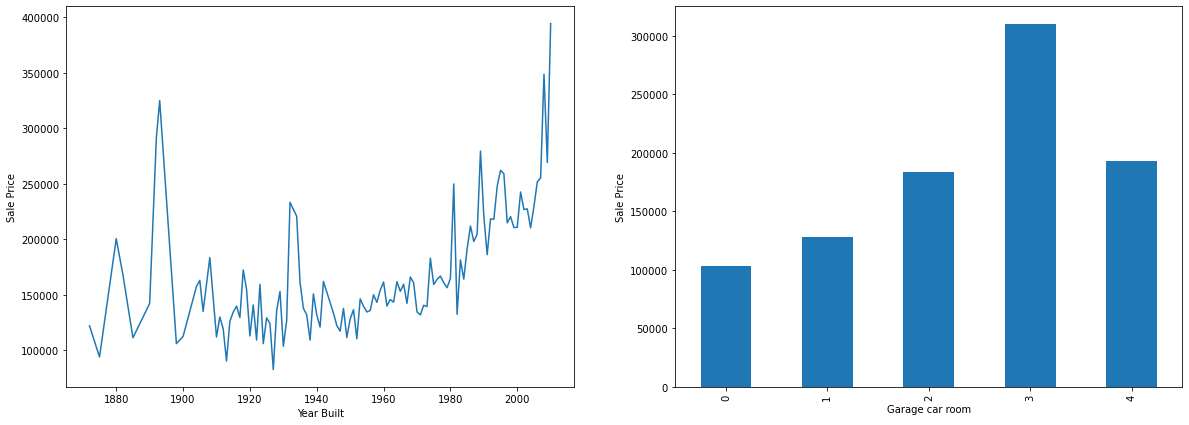

In [89]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig=(20,7)
data.groupby('YearBuilt').mean()['SalePrice'].plot(ylabel='Sale Price',xlabel='Year Built',ax=axes[0],figsize=fig)
data.groupby('GarageCars').mean()['SalePrice'].plot(kind='bar',ylabel='Sale Price',xlabel='Garage car room',ax=axes[1],figsize=fig)

### The cell below scales the numeric features using a min_max_scaler (scales them between 0 and 1)

In [ ]:
numeric_columns = train_x.select_dtypes(include='number').columns
# scaler = sklearn.preprocessing.MinMaxScaler()
# scaler = sklearn.preprocessing.KBinsDiscretizer(n_bins=10, encode='ordinal')
scaler = sklearn.preprocessing.StandardScaler()
# train on concatenation of train and validation
scaler.fit(pd.concat((train_x[numeric_columns], valid_x[numeric_columns])))
# apply on all data
train_x[numeric_columns] = scaler.transform(train_x[numeric_columns])
valid_x[numeric_columns] = scaler.transform(valid_x[numeric_columns])
test_x[numeric_columns] = scaler.transform(test_x[numeric_columns])


### The cell below one-hot encodes the data

In [ ]:
def get_dummies_column_keys(dataFrames):
    '''returns a column list of get dummies for concatenated dataframes'''
    return pd.get_dummies(pd.concat(dataFrames)).columns.tolist()

def get_dummies_using_keys(dataFrame, column_keys):
    '''returns get dummies result with columns matching column_keys'''
    result = pd.get_dummies(dataFrame)
    result = result.reindex(columns=column_keys).fillna(0.00)
    return result

# get the keys for the concatenation of all datasets 
column_keys = get_dummies_column_keys((train_x, valid_x, test_x))
train_x = get_dummies_using_keys(train_x, column_keys)
valid_x = get_dummies_using_keys(valid_x, column_keys)
test_x = get_dummies_using_keys(test_x, column_keys)

### The cell below appends a '1' to all rows by adding a 'Bias' feature with the value of 1 for all rows<br/> This is to simulate a bias without adding any bias functionality to the Linear Regression algorithm 

In [ ]:
train_x['Bias'] = 1
valid_x['Bias'] = 1
test_x['Bias'] = 1

### This last cell gets the numpy arrays that we will work on from the panda dataframes

In [ ]:
# store the dataframes in df_* variables
df_train_x, df_train_y = train_x, train_y
df_valid_x, df_valid_y = valid_x, valid_y
df_test_x, df_test_y = test_x, test_y

# store the numpy arrays in the regular variables
train_x, train_y = train_x.values, train_y.values
valid_x, valid_y = valid_x.values, valid_y.values
test_x, test_y = test_x.values, test_y.values

# Proceed with any data analysis in the next cell

## (Optional but encouraged)

# This is the main task of the excercise

## You need to implement the following functions which <br/> implements Linear Regression and all it's required functions

### The first major function is the 'predict' function <br/> Remember the Linear Regression equation is
$$\hat{Y} = w_0 + w_1 x_1 + w_2 x_2 + ... + w_m x_m$$

### hint: try to implement a 'vectorized' version by using a matrix multiplication<br/> which will massively increase performance

In [ ]:
 def predict(w, x):
    '''
    Return the linear regression prediction from the weights and input features
    Args:
        w: The weight vector, shape: (features, 1)
        x: The input data, shape: (num_samples, features)
    Returns:
        The prediction of the model, shape: (num_samples, 1)
    '''
    ### YOUR CODE HERE
    raise NotImplementedError

def init_weights(x):
    '''
    Initialize the weights vector, the data is passed in to know how many weights you need
    Args:
        x: The input data, shape: (num_samples, features)
    Returns:
        The initial weight vector of zeros, shape: (features, 1)
    '''
    ### YOUR CODE HERE
    raise NotImplementedError

### Next you have to implement the Mean Squared Error Loss calculation by applying the following formula 
$$LOSS(W)=\frac{1}{2n} \sum_{i=1}^{n} (\hat{y}_i-y_i)^2$$

In [ ]:
def loss(y_hat, y):
    '''
    Calculate the Mean Squared Error based on the y_hat (the predicted value) and y (the true values)
    Args:
        y_hat: the predicted values of the input, shape: (num_samples, 1)
        y: the true values of the input, shape: (num_samples, 1)
    Returns:
        Mean Squared Error, shape: Scaler
    '''
    ### YOUR CODE HERE
    raise NotImplementedError

### Next you have to implement the gradient calculation for the weights accoarding to the formula

$$\frac{\partial LOSS(W)}{\partial W_j} 
= \frac{\partial}{\partial W_j} \frac{1}{2n} \sum_{i=1}^{n} (\hat{y}_i-y_i)^2
= \frac{1}{2} \sum_{i=1}^{n} ((\hat{y}_i-y_i)*x_{i,j})$$

In [ ]:

def get_gradient(w, x, y_hat, y):
    '''
    Get the gradient of the weights using the parameters passed 
    (Note: not all parameters passed have to be used)
    Args:
        w: The weight vector, shape: (features, 1)
        x: The input data, shape: (num_samples, features)
        y_hat: the predicted values of the input, shape: (num_samples, 1)
        y: the true values of the input, shape: (num_samples, 1)
    Returns:
        The gradients of the weight vector, shape: (features, 1)
    '''
    ### YOUR CODE HERE
    raise NotImplementedError

### Next you have to implement the gradient descent update for the weights according to the formula

$$w_j:=w_j - \alpha * \frac{\partial LOSS(W)}{\partial W_j} $$

In [ ]:
def get_updated_weights(w, w_gradients, learning_rate):
    '''
    Calculate the new value of the weights after applying the gradient descent weight update rule 
    Args:
        w: The weight vector, shape: (features, 1)
        w_gradients: The gradients of the weight vector, shape: (features, 1)
        learning_rate: The learning rate of the algorithm, shape: Scaler
    Returns:
        The updated value of the weights, shape: (features, 1)
    '''
    ### YOUR CODE HERE
    raise NotImplementedError

### Finally implement the training loop, this should simply be<br/> a loop that calls the functions you implemented above

In [ ]:
def train(epochs, x, y, learning_rate=1e-3, initial_weights=None):
    '''
    The main train loop for the algorithm. This performs the gradient update step 'epochs' times.
    Args:
        x: The input data, shape: (num_samples, features)
        y: the true values of the input, shape: (num_samples, 1)
        learning_rate: The learning rate of the algorithm, shape: Scaler
        initial_weights: The initial weight to start training, this should be passed to continue training
    Returns:
        The final weight values after applying 'epochs' number of updates on 'initial_weights', shape: (features, 1)
    '''
    if initial_weights is None:
        weight = init_weights(x)
    else:
        weight = initial_weights
    
    for epoch in range(epochs):
        ### YOUR CODE HERE
        raise NotImplementedError


### The cell below will run your code

### After 200,000 epochs our results were the following: 
### Train loss: 2.39e+08<br/> Valid loss: 3.65e+08<br/> Test loss: 3.60+08

In [ ]:
%%time
w = None
for i in range(20):
    w = train(10000, train_x, train_y, learning_rate=5e-3, initial_weights=w)
    print('epoch:', (i+1)*10000, end='   ')
    print('Train loss:', loss(predict(w, train_x), train_y), end='   ')
    print('Valid loss:', loss(predict(w, valid_x), valid_y))
print('Final Model -- Test loss:', loss(predict(w, test_x), test_y))